# Daily aggregated values

For daily lightning time series it would be useful to add: 

 - total flash count
 - maximum CG flash density
 - location of maximum flash density (lat lon) and perhaps
 - area exceeding several CG flash density thresholds (0.5, 1 and 2 CG strikes / km2)
 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import xarray as xr
from scipy.ndimage.filters import gaussian_filter

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import StamenTerrain

from pointprocess import *
import pointprocess.plotting as pplot
from lightning_setup import *

In [14]:
city = 'stlouis'
c = Region(city=cities[city])
c.define_grid()

In [4]:
%%time
top10 = c.get_top(10)

CPU times: user 6.16 s, sys: 171 ms, total: 6.33 s
Wall time: 11.1 s


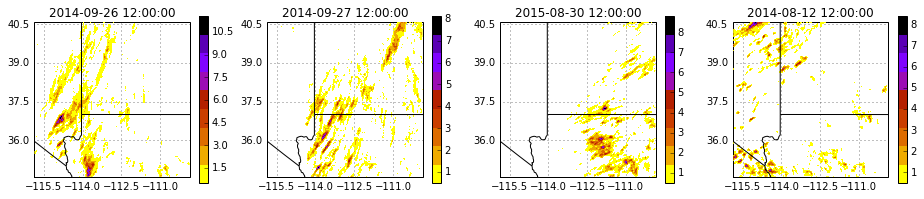

In [5]:
plt.figure(figsize=(16, 3))
for n in range(1,5):    
    ax = pplot.background(plt.subplot(1, 4, n, projection=ccrs.PlateCarree()))
    ds0 = c.get_daily_ds(top10.index[n-1],func='grid')
    ds0.close()
    c.plot_grid(gaussian_filter(c.FC_grid,2), cmap=cmap, vmin=.5, cbar=True, ax=ax)
    ax.set_title(top10.index[n-1])

## Total flash count for a given day

In [12]:
c.get_daily_ds('2014-09-26 12:00:00', func='count')

91884

In [15]:
# or equivalently
c.get_daily_ds('2014-09-26 12:00:00', func='grid')
c.FC_grid.sum()

91884.0

## Max daily flash count per grid cell

In [13]:
c.get_daily_ds('2014-09-26 12:00:00', func='max')

23.0

In [14]:
# or equivalently
c.FC_grid.max()

23.0

## Area over threshold

In [17]:
c.area_over_thresh([1,2,5,10, 20])

Area exceeding 1 strikes: 47103 km^2
Area exceeding 2 strikes: 20153 km^2
Area exceeding 5 strikes: 3191 km^2
Area exceeding 10 strikes: 397 km^2
Area exceeding 20 strikes: 7 km^2


## Location of maximum

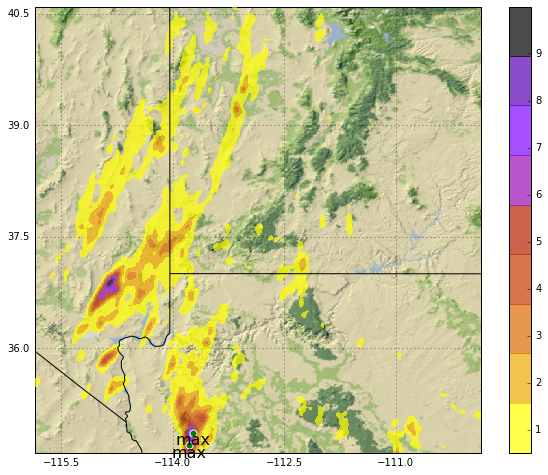

In [21]:
#location of maximum flash density (lat lon)
yy, xx= np.where(c.FC_grid==c.FC_grid.max())
locmax = c.gridx[xx], c.gridy[yy]

plt.figure(figsize=(10,8))
im, ax = c.plot_grid(gaussian_filter(c.FC_grid, 3), cmap=cmap, vmin=.5, cbar=True, alpha=.7)
ax.add_image(StamenTerrain(), 7)
ax.scatter(locmax[0], locmax[1], c='g', s=50, edgecolor='white', zorder=11)
for lon, lat in zip(locmax[0], locmax[1]):
    ax.text(lon, lat, 'max', zorder=12, horizontalalignment='center',
            verticalalignment='top', fontsize=16);

## A more even yearly breakdown of top events

In [8]:
%%time
top10 = None
for year in range(2001, 2016):
    top10 = pd.concat([top10, c.get_top(10, year=year)])

CPU times: user 25.3 s, sys: 439 ms, total: 25.8 s
Wall time: 31.8 s


In [36]:
pivot = top10.groupby([top10.index.month, top10.index.year]).count().unstack()

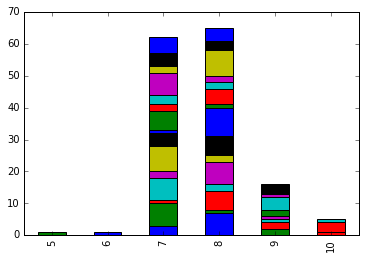

In [46]:
pivot.plot.bar(stacked=True, legend=False)